In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv("D:\Abhinesh\spamClassifier\spam.csv",encoding="ISO-8859-1")

In [11]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
932,ham,So do you have samus shoulders yet,NaN,NaN,NaN
5298,ham,I.ll hand her my phone to chat wit u,NaN,NaN,NaN
4410,ham,Ya but it cant display internal subs so i gott...,NaN,NaN,NaN
4491,ham,Probably a couple hours tops,NaN,NaN,NaN
4836,ham,....photoshop makes my computer shut down.,NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
#1.Data cleaning
#2.EDA
#3.Text preprocessing
#4.Model building
#5.Evaluation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
# droping unneccessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.sample(5)

,v1,v2
966,ham,I am not sure about night menu. . . I know onl...
4191,ham,&lt;#&gt; w jetton ave if you forgot
4871,ham,Hi dis is yijue i would be happy to work wif Ã...
1160,ham,You sure your neighbors didnt pick it up
1864,ham,You call him now ok i said call him


In [17]:
#rename the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...
2827,ham,Wife.how she knew the time of murder exactly
1318,ham,Ok...
641,ham,"said kiss, kiss, i can't do the sound effects..."
437,ham,How long does applebees fucking take


In [19]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [20]:
df['target']=encode.fit_transform(df['target'])

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# remove missing value but  i checked my dataset their no missing value which is good for dataset
df.isnull().sum()

target    0
text      0
dtype: int64

In [26]:
# check of duplicates
df.duplicated().sum()

np.int64(403)

In [27]:
df = df.drop_duplicates(keep='first')

In [34]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [35]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

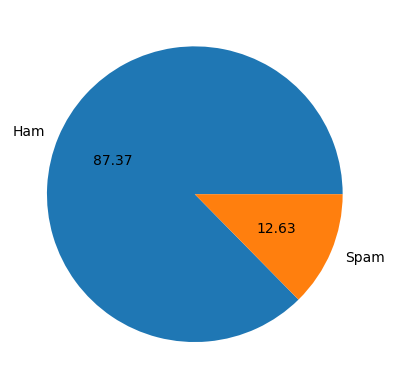

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [41]:
# nltk stand - natural Language toolkit

In [42]:
import nltk

In [43]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Abhinesh
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [44]:
# punkt_tab is basically a tokenizer which is basic does divide a text into sentence by using unsupervised leaning to build a model for abbreviation words,
# collection , and words that  start sentences.

In [45]:
df.columns

Index(['target', 'text'], dtype='object')

In [46]:
df['num_characters'] =df['text'].apply(len)

In [47]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [51]:
#now >> count the number of sentence
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [54]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [56]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.200426,18.456761,1.966531
std,58.387001,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# the ham messages only , target = 0 = ham >> insights
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.590788,17.123782,1.820195
std,56.405390,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

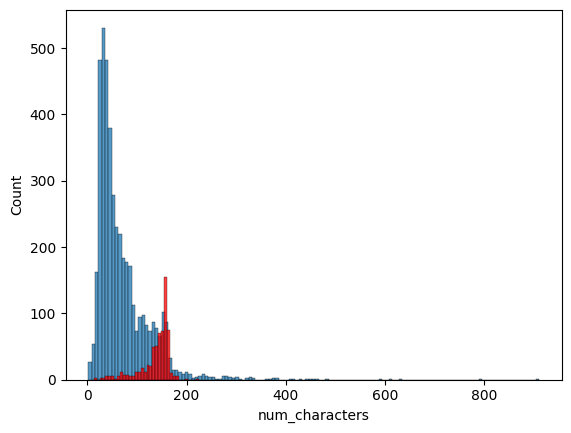

In [61]:
# Data visualization module
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')



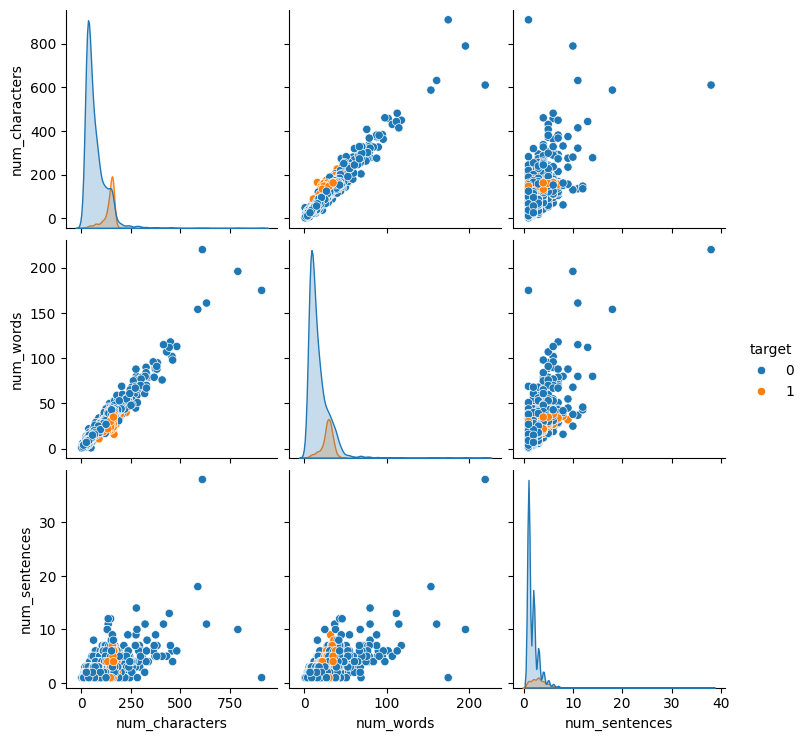

In [62]:
sns.pairplot(df,hue='target')

<Axes: >

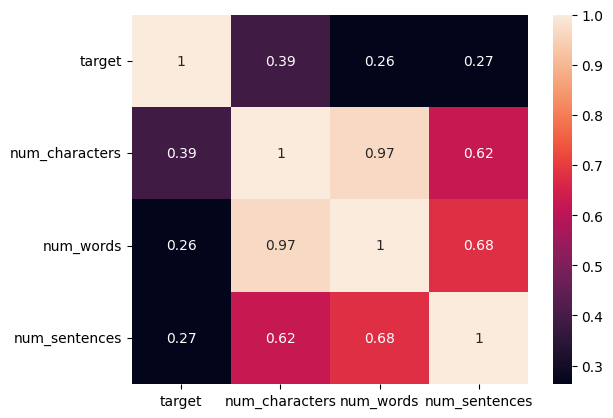

In [63]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

Data Preprocessing

In [66]:
# lowercase
# tokenize
# remove special characeters like , . ! $
# stopword removal
# stemming

In [67]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Abhinesh
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [70]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [71]:
import string

Transform(text) ----------> apply above methon like 

 lowercase

 tokenize

 remove special characeters like , . ! $

 stopword removal
 
 stemming

it will return clean data

In [78]:
def transform_text(text):
    text = text.lower()  # Lowercasing
    text = nltk.word_tokenize(text)  # Tokenizing
    y = []

    # Remove non-alphanumeric characters
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()  # Corrected: Ensure the list is cleared properly

    # Stopword and punctuation removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()  # Corrected: Ensure the list is cleared properly

    # Stemming
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [80]:
transform_text("I 'm gonna be home soon and i don't want to talk to anyone about it.")

'gon na home soon want talk anyon'

In [81]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [82]:
df['transform_text'] = df['text'].apply(transform_text)

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
import wordcloud

In [87]:
from wordcloud import WordCloud

In [90]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')